In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')


In [2]:
df = pd.read_csv('../input/rollercoaster-database/coaster_db.csv')

**Step 1:** Data Understanding
* dataframe shape
*  head and tail
*  describe or info

In [3]:
df.shape

(1087, 56)

In [4]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.info()  
#df.dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [7]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


**Step 2:** Data Preparation
*  Dropping irrelevant columns and rows
*  Modifying data types
*  Identifying duplicated columns
*  Renaming columns
*  Feature Creation

In [8]:
# Dropping by selecting desired column (Subsetting)
sub_df = df[['coaster_name',  'Manufacturer','Location', 'Status','Opened','year_introduced', 'latitude', 'longitude', 'Type_Main','opening_date_clean', 
       'speed_mph','height_ft','Inversions_clean', 'Gforce_clean']].copy()

# by df.drop method
# df.drop(['Opening date'], axis = 1)

In [9]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Manufacturer        1028 non-null   object 
 2   Location            1087 non-null   object 
 3   Status              874 non-null    object 
 4   Opened              27 non-null     object 
 5   year_introduced     1087 non-null   int64  
 6   latitude            812 non-null    float64
 7   longitude           812 non-null    float64
 8   Type_Main           1087 non-null   object 
 9   opening_date_clean  837 non-null    object 
 10  speed_mph           937 non-null    float64
 11  height_ft           171 non-null    float64
 12  Inversions_clean    1087 non-null   int64  
 13  Gforce_clean        362 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 119.0+ KB


In [10]:
# Modify as datetime
sub_df['opening_date_clean'] = pd.to_datetime(sub_df['opening_date_clean'])


# Modify as integer
sub_df['year_introduced'] = pd.to_numeric(sub_df['year_introduced'])

In [11]:
# Rename our columns
sub_df = sub_df.rename(columns={'coaster_name':'Coaster_Name','year_introduced':'Year_Introduced','opening_date_clean':'Opening_Date',
                      'speed_mph':'Speed_mph','height_ft':'Height_ft','Inversions_clean':'Inversions','Gforce_clean':'Gforce'})


In [12]:
sub_df.isna().sum()

Coaster_Name          0
Manufacturer         59
Location              0
Status              213
Opened             1060
Year_Introduced       0
latitude            275
longitude           275
Type_Main             0
Opening_Date        250
Speed_mph           150
Height_ft           916
Inversions            0
Gforce              725
dtype: int64

In [13]:
# Search for duplicated columns
sub_df.loc[sub_df.duplicated()]

,Coaster_Name,Manufacturer,Location,Status,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [14]:
# Search for duplicated rows
sub_df.loc[sub_df.duplicated(subset='Coaster_Name')]

,Coaster_Name,Manufacturer,Location,Status,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Traver Engineering,Crystal Beach Park,Removed,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Fred W. Pearce,Revere Beach,Removed,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),NaN,Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Arrow Development (California and Florida)Dyna...,Other,NaN,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Mack Rides,Canada's Wonderland,Operating,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Zamperla,Six Flags Great Adventure,Operating,NaN,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Allan Herschell Company,Conneaut Lake Park,Operating,NaN,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Rocky Mountain Construction,Busch Gardens Tampa Bay,Under construction,NaN,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Anton Schwarzkopf,Other,NaN,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [16]:
# tilde ~ is to inverse the conditions
sub_df = sub_df.loc[~sub_df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

In [15]:
# Checking an example duplicate
sub_df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Manufacturer,Location,Status,Opened,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Traver Engineering,Crystal Beach Park,Removed,NaN,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Traver Engineering,Crystal Beach Park,Removed,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


**Step 3:** Feature Understanding

* Histogram/ KDE/ Boxplot for Distributions

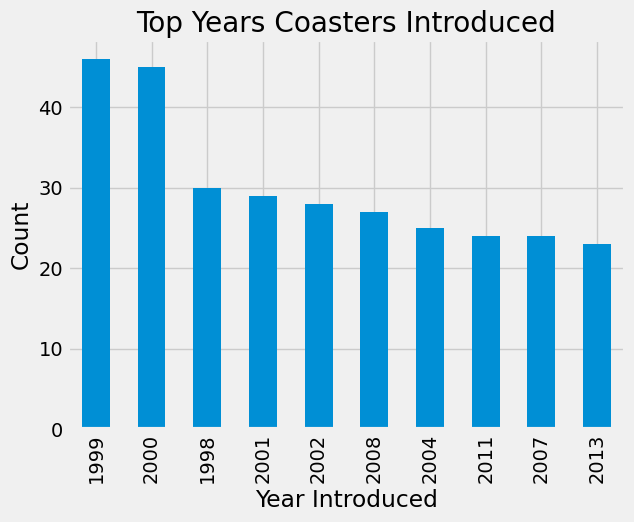

In [32]:
ax = sub_df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')
plt.show()

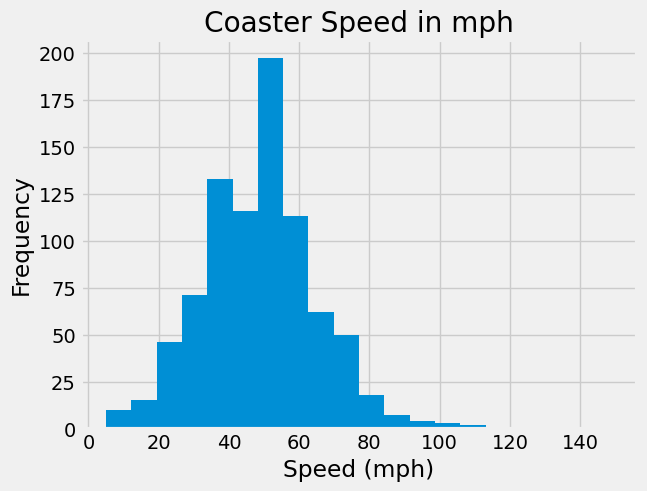

In [33]:
# General approach to check distribution
ax = sub_df['Speed_mph'].plot(kind='hist',bins=20,title='Coaster Speed in mph')
ax.set_xlabel('Speed (mph)')
plt.show()

Text(0.5, 0, 'Speed (mph)')

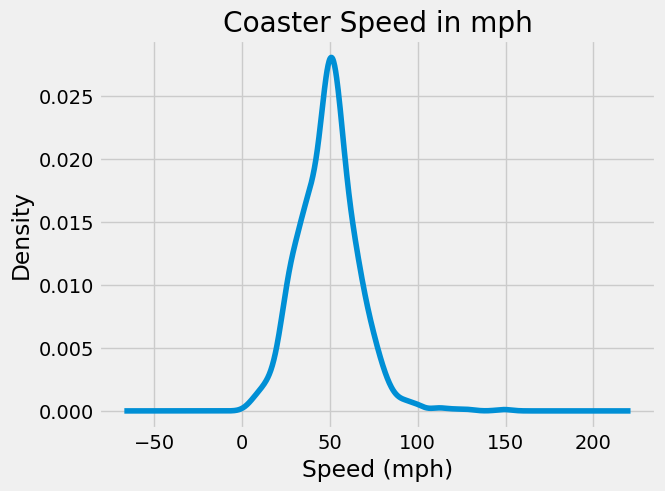

In [30]:
# For normal distribution
ax = sub_df['Speed_mph'].plot(kind='kde',title='Coaster Speed in mph')
ax.set_xlabel('Speed (mph)')

**Step 4:** Feature Relationships
* Scatter Plot (for 2 features)
* Heatmap Correlation
* Pairplot
* Groupby Comparison

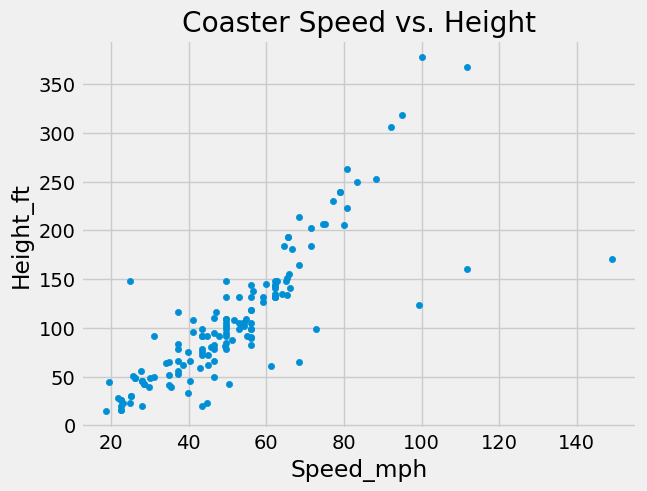

In [31]:
# Scatter Plot by Matplotlib
sub_df.plot(kind='scatter', x = 'Speed_mph', y = 'Height_ft',title='Coaster Speed vs. Height')
plt.show()

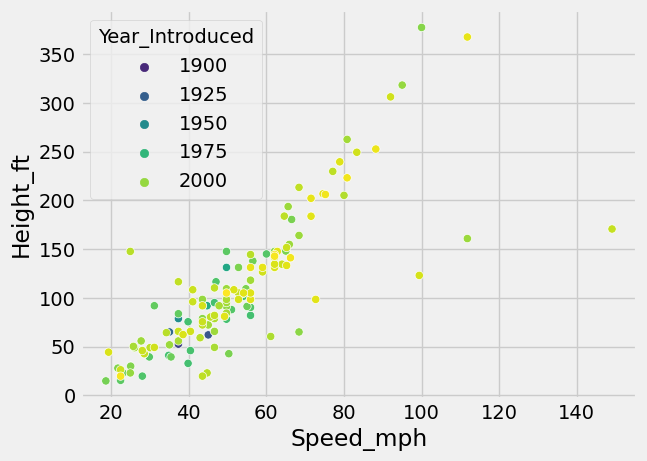

In [38]:
# Scatter Plot by Seaborn
sns.scatterplot(sub_df,x='Speed_mph',y='Height_ft',hue='Year_Introduced',palette='viridis')
plt.show()

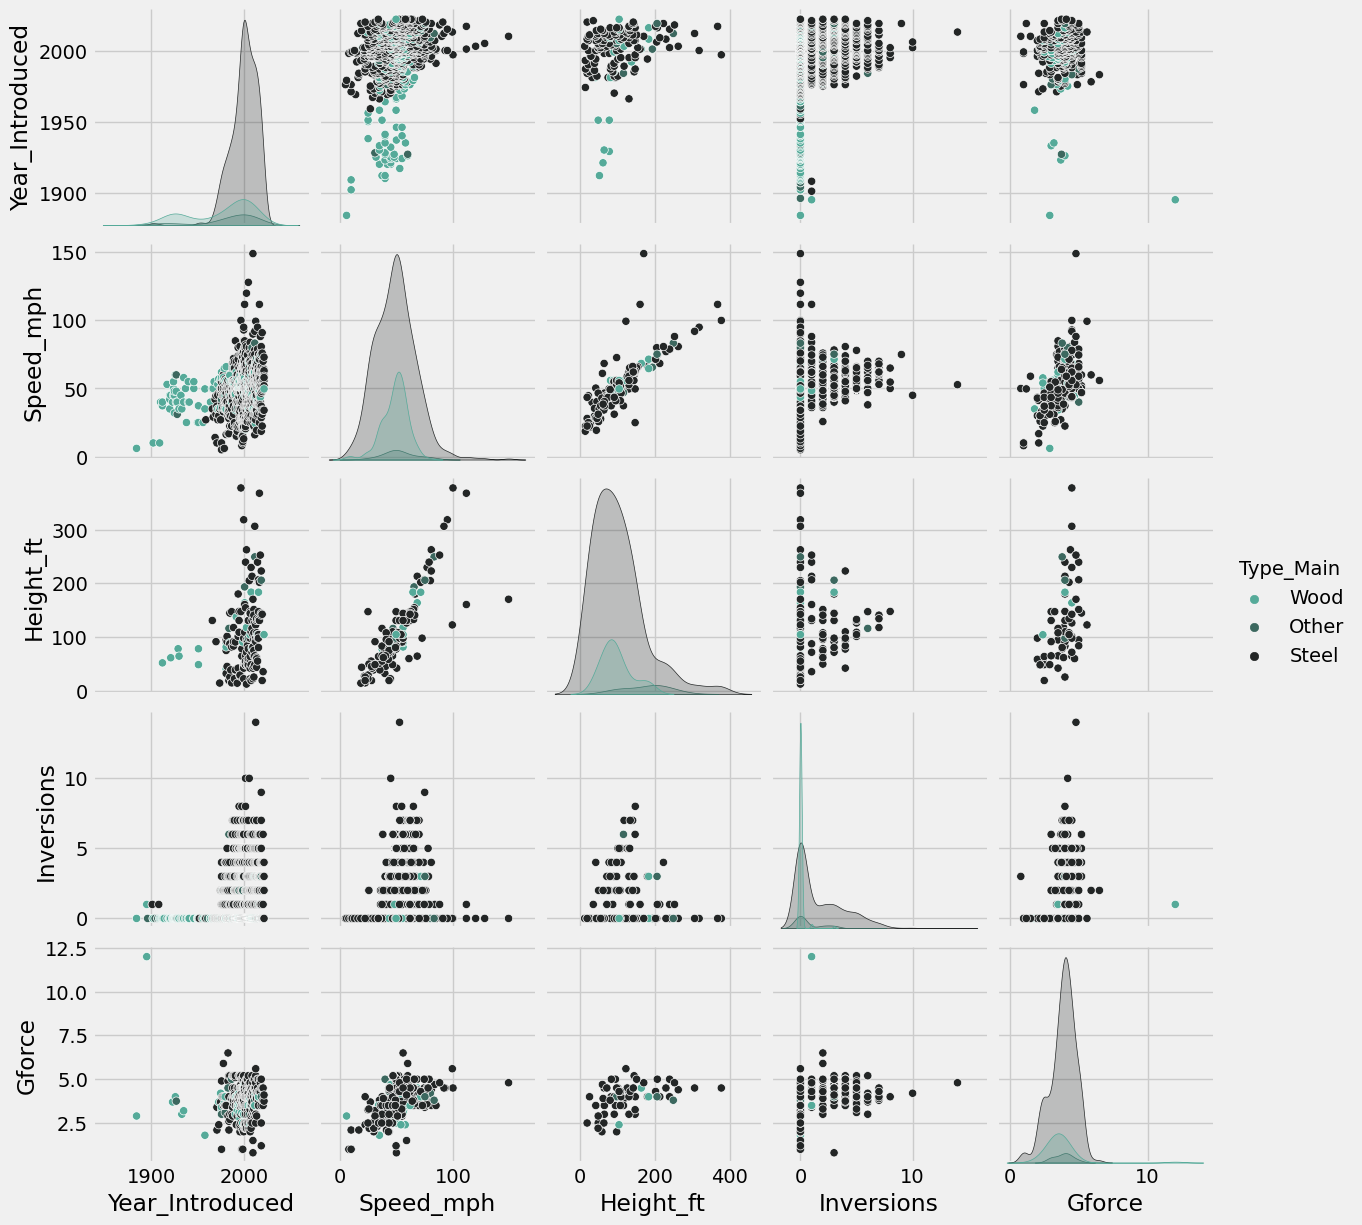

In [44]:
sns.pairplot(sub_df, vars=['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce'],palette='dark:#5A9_r',hue='Type_Main')
plt.show()

In [47]:
df_corr = sub_df[['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()

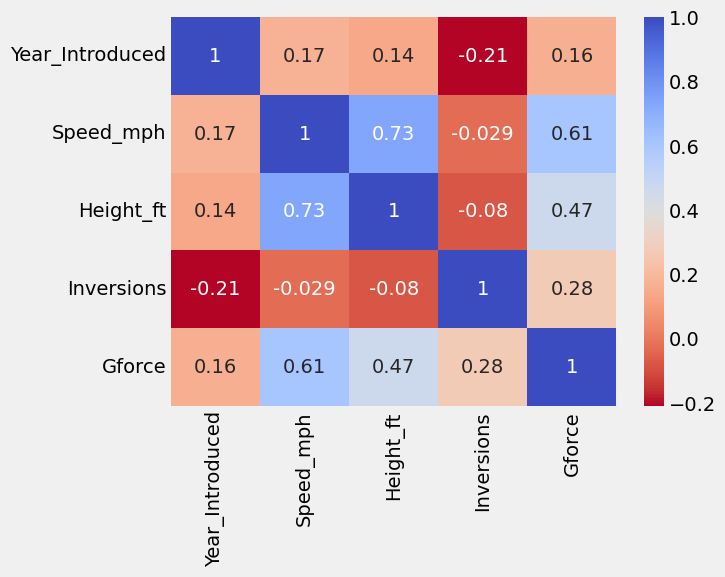

In [49]:
sns.heatmap(df_corr, cmap='coolwarm_r',annot=True)
plt.show()

**Step 5:** Ask a Question about the Data

Try to answer a question you have about the data using a plot or statistics

1. What are the locations with the fastest roller coasters (top 10)?

In [52]:
sub_df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'].agg(['mean','count']).query('count >=10').sort_values('mean')

,mean,count
Location,,
Alton Towers,42.791667,12
Carowinds,43.571429,14
Kings Island,49.273684,19
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Six Flags Great Adventure,53.036364,11
Canada's Wonderland,53.533333,12
Six Flags Magic Mountain,57.241176,17
Cedar Point,57.833333,18


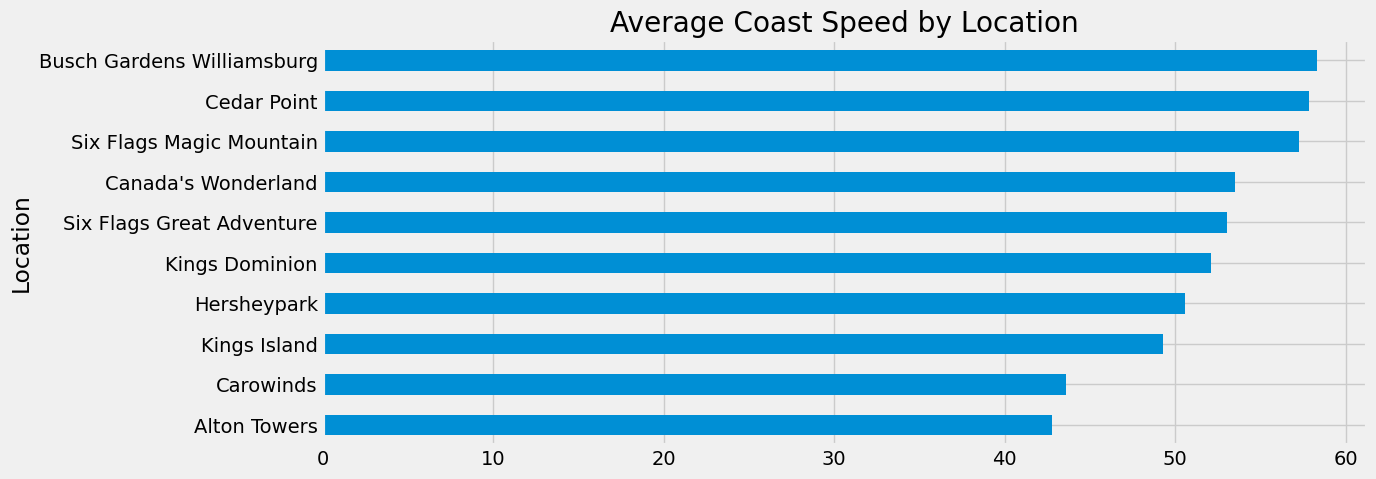

In [54]:
sub_df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'].agg(['mean','count']).query('count >=10').sort_values('mean')['mean'].\
    plot(kind='barh',figsize=(12,5),title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()